## Mobile Price Prediction 

- **1. Brand me** This is first feature of our dataset. It's Denotes name of the mobile phones and   Brands.</br>
- **2. ROM** It's have ROM **(Internal Memory)** size of the phone. </br>
- **3. RAM** It's have RAM size of the phone. </br>
- **4. Primary_Cam** It's Denotes Number of the pixels of the primary camera **(Back Camera)** for each mobiles.</br>
- **5. Selfi_Cam** It's Denotes Number of the pixels of the Selfi camera **(Front Camera)** for each mobiles.</br>
- **6. Battery_Power** It's Denotes amount of the battery power in each mobiles in **mAh**.</br>
- **7. Price** It's a Dependent Feature of the dataset. It's just denote prices of the each mobiles.

### Import the Libraires and Dataset

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Import Dataset
d = pd.read_csv("Mobile_price_data.csv")
d.head()

Brand me  ROM(GB)  RAM(GB)  Primary_Cam(MP)  \
0            LG V30+ (Black, 128 )    128.0      4.0             48.0   
1                       I Kall K11     64.0      6.0             48.0   
2                     Nokia 105 ss      4.0      4.0             64.0   
3  Samsung Galaxy A50 (White, 64 )     64.0      6.0             48.0   
4       POCO F1 (Steel Blue, 128 )    128.0      6.0             35.0   

   Selfi_Cam(MP)  Battery_Power(mAh)    Price  
0           13.0              4000.0  24999.0  
1           12.0              4000.0  15999.0  
2           16.0              4000.0  15000.0  
3           15.0              3800.0  18999.0  
4           15.0              3800.0  18999.0

In [3]:
d.duplicated().sum()

259

### Data Preprocessing

In [4]:
# Drop the Unwannted column the first one
# df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
# Checking null values into the dataset
d.isnull().sum()

Brand me                0
ROM(GB)                 5
RAM(GB)                 8
Primary_Cam(MP)         1
Selfi_Cam(MP)         270
Battery_Power(mAh)      1
Price                   1
dtype: int64

In [6]:
# Summary of the dataset
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand me            1296 non-null   object 
 1   ROM(GB)             1291 non-null   float64
 2   RAM(GB)             1288 non-null   float64
 3   Primary_Cam(MP)     1295 non-null   float64
 4   Selfi_Cam(MP)       1026 non-null   float64
 5   Battery_Power(mAh)  1295 non-null   float64
 6   Price               1295 non-null   float64
dtypes: float64(6), object(1)
memory usage: 71.0+ KB


In [7]:
d.dtypes

Brand me               object
ROM(GB)               float64
RAM(GB)               float64
Primary_Cam(MP)       float64
Selfi_Cam(MP)         float64
Battery_Power(mAh)    float64
Price                 float64
dtype: object

In [8]:
# Describe
d.describe()

ROM(GB)      RAM(GB)  Primary_Cam(MP)  Selfi_Cam(MP)  \
count  1291.000000  1288.000000      1295.000000    1026.000000   
mean     72.451123     5.642857        41.549807      12.845029   
std      58.778545     2.446905        17.744942       8.235222   
min       0.000000     0.000000         5.000000       0.000000   
25%      32.000000     4.000000        35.000000       8.000000   
50%      64.000000     6.000000        48.000000      12.000000   
75%     128.000000     6.000000        48.000000      16.000000   
max     512.000000    34.000000       108.000000      61.000000   

       Battery_Power(mAh)          Price  
count         1295.000000    1295.000000  
mean          3588.969112   17661.430888  
std            932.434408   42739.889457  
min           1020.000000     479.000000  
25%           3000.000000    1299.000000  
50%           3700.000000   10999.000000  
75%           4100.000000   18990.000000  
max           6000.000000  573000.000000

In [9]:
d.shape

(1296, 7)

In [10]:
# Dropping the Name columns
# df.drop(['Brand me'],axis=1,inplace=True)

# Data Visualization 

<AxesSubplot:>

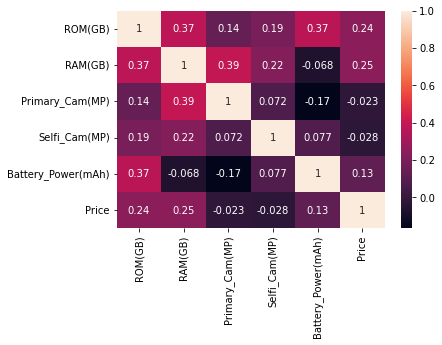

In [11]:
result = d.corr()
result
sns.heatmap(result, annot = True)

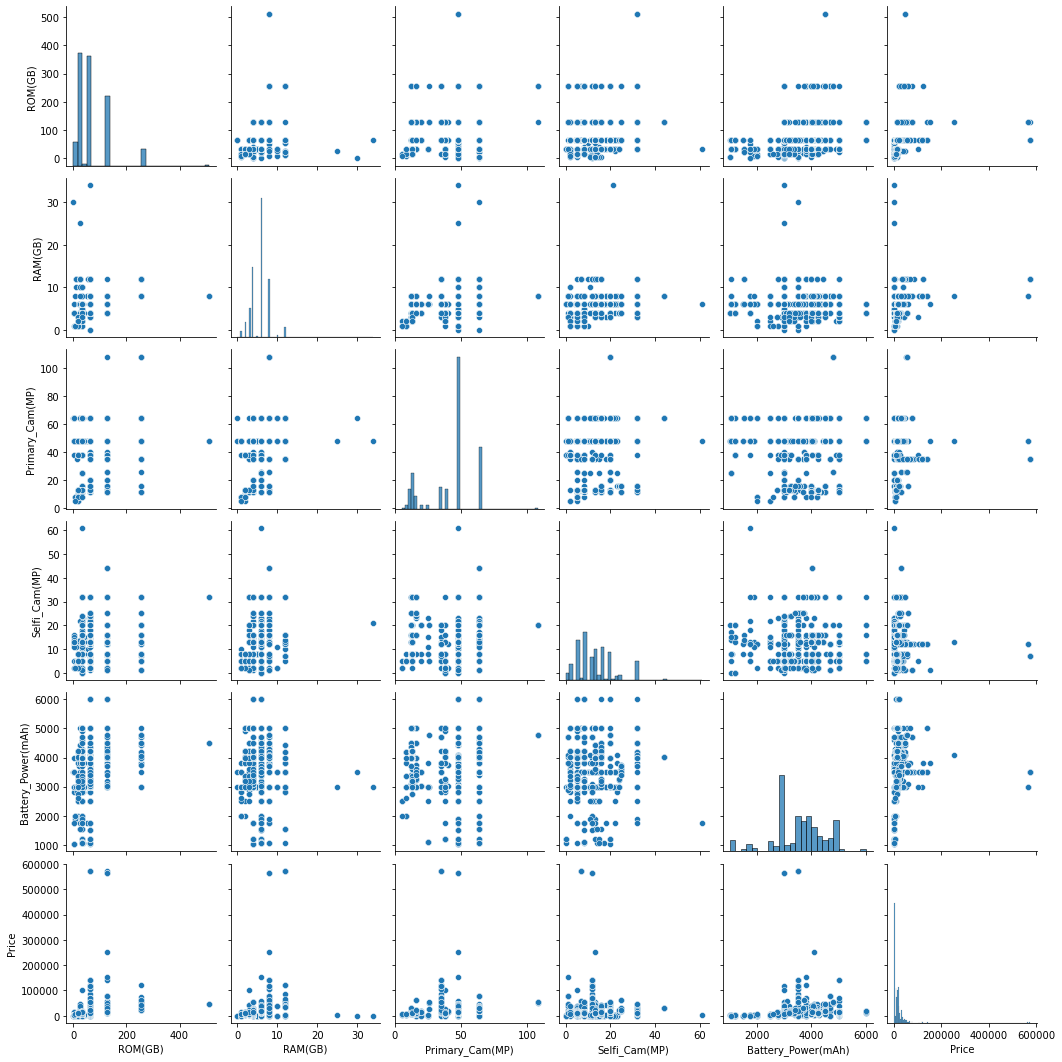

In [12]:
sns.pairplot(d)
plt.show()

C:\Users\Tandin Jamtsho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


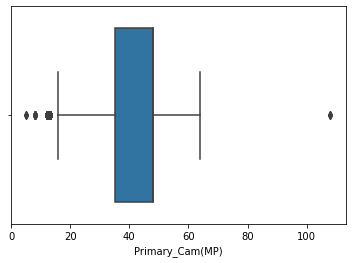

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

o = d['Primary_Cam(MP)']
sns.boxplot(o)
plt.show()

In [14]:
Q1 = d['Primary_Cam(MP)'].quantile(0.25)
Q3 = d['Primary_Cam(MP)'].quantile(0.75)

IQR = Q3-Q1

upperlimit = Q3 + (IQR*1.5)
lowerlimit = Q1 - (IQR*1.5)

ddf=d[(d['Primary_Cam(MP)'] > lowerlimit) & (d['Primary_Cam(MP)'] < upperlimit)]
ddf.shape

(1060, 7)

C:\Users\Tandin Jamtsho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


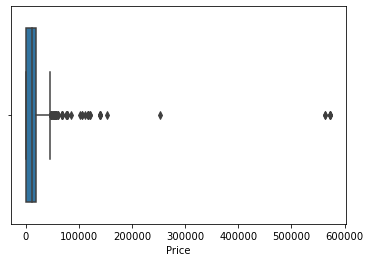

In [15]:

z = d['Price']
sns.boxplot(z)
plt.show()

In [16]:
Q1 = ddf['Price'].quantile(0.25)
Q3 = ddf['Price'].quantile(0.75)

IQR = Q3-Q1

upperlimit = Q3 + (IQR*1.5)
lowerlimit = Q1 - (IQR*1.5)

df=ddf[(ddf['Price'] > lowerlimit) & (ddf['Price'] < upperlimit)]
df.shape

(1005, 7)

### Handling Missing Values

In [17]:
# We should handling these null or missing values
df.isnull().sum()

Brand me                0
ROM(GB)                 4
RAM(GB)                 7
Primary_Cam(MP)         0
Selfi_Cam(MP)         263
Battery_Power(mAh)      0
Price                   0
dtype: int64

In [18]:
#SimpleImputer handles missing values
null_columns = ['ROM(GB)','RAM(GB)','Primary_Cam(MP)','Selfi_Cam(MP)','Battery_Power(mAh)','Price']
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(df[null_columns])
df[null_columns] = imputer.transform(df[null_columns])

C:\Users\Tandin Jamtsho\AppData\Local\Temp\ipykernel_1512\1307225747.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[null_columns] = imputer.transform(df[null_columns])


In [19]:
df.isnull().sum()

Brand me              0
ROM(GB)               0
RAM(GB)               0
Primary_Cam(MP)       0
Selfi_Cam(MP)         0
Battery_Power(mAh)    0
Price                 0
dtype: int64

In [20]:
df.head()

Brand me  ROM(GB)  RAM(GB)  Primary_Cam(MP)  \
0            LG V30+ (Black, 128 )    128.0      4.0             48.0   
1                       I Kall K11     64.0      6.0             48.0   
2                     Nokia 105 ss      4.0      4.0             64.0   
3  Samsung Galaxy A50 (White, 64 )     64.0      6.0             48.0   
4       POCO F1 (Steel Blue, 128 )    128.0      6.0             35.0   

   Selfi_Cam(MP)  Battery_Power(mAh)    Price  
0           13.0              4000.0  24999.0  
1           12.0              4000.0  15999.0  
2           16.0              4000.0  15000.0  
3           15.0              3800.0  18999.0  
4           15.0              3800.0  18999.0

In [21]:
from sklearn.model_selection import train_test_split
# Value Assigning
X = df.iloc[:,[1,2,3,4,5]]
y = df.iloc[:,[-1]]
# y=df.Price
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=5)
y.head()

Price
0  24999.0
1  15999.0
2  15000.0
3  18999.0
4  18999.0

In [22]:
y_train

Price
285   12649.0
184    3149.0
45     7490.0
232   22221.0
975   16999.0
...       ...
132    1690.0
1283  38990.0
756    1099.0
230     599.0
971   21999.0

[804 rows x 1 columns]

In [23]:
X_test

ROM(GB)  RAM(GB)  Primary_Cam(MP)  Selfi_Cam(MP)  Battery_Power(mAh)
644    128.0      8.0             48.0       2.000000              3500.0
714     32.0      6.0             48.0      13.397574              3000.0
297     32.0      6.0             64.0      13.397574              1050.0
375     25.0     12.0             48.0      13.000000              4440.0
13      32.0      6.0             64.0       8.000000              3000.0
..       ...      ...              ...            ...                 ...
505     32.0      6.0             48.0      13.397574              3000.0
538     64.0      4.0             38.0       2.000000              4230.0
960     64.0      4.0             48.0      13.000000              4000.0
974    128.0      6.0             64.0      32.000000              5020.0
948     64.0      4.0             48.0      32.000000              4030.0

[201 rows x 5 columns]

In [24]:
y_test

Price
644  15490.0
714   1499.0
297   1299.0
375  44990.0
13    3999.0
..       ...
505    999.0
538  15656.0
960  10100.0
974  16999.0
948  12999.0

[201 rows x 1 columns]

In [25]:
from sklearn.pipeline import Pipeline

#SimpleImputer handles missing values
from sklearn.impute import SimpleImputer

#Standard Scaler normalise the numeric data so that large values does not
#create biasness in the training

#OneHotEndcoder converts categorical data to numerical, it also creates individual
#for each option in the categories
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

In [26]:
numeric_cols = X.select_dtypes(include=['int64','float64']).columns
print(numeric_cols)

Index(['ROM(GB)', 'RAM(GB)', 'Primary_Cam(MP)', 'Selfi_Cam(MP)',
       'Battery_Power(mAh)'],
      dtype='object')


In [27]:
#Building the Numeric Transformation Pipeline
n_transformer = Pipeline(steps=
                       [
                           ('imputeN',SimpleImputer(strategy='mean')),
                           ('scale',StandardScaler())
                       ])

In [28]:
from sklearn.compose import ColumnTransformer
preprocessing = ColumnTransformer(transformers=
                       [
                           ('numeric',n_transformer,numeric_cols)
                       ])

In [29]:
df.duplicated().sum()

217

In [30]:
df.isna().sum()

Brand me              0
ROM(GB)               0
RAM(GB)               0
Primary_Cam(MP)       0
Selfi_Cam(MP)         0
Battery_Power(mAh)    0
Price                 0
dtype: int64

# KNeighbors 

In [31]:
#Create estimator
from sklearn.neighbors import KNeighborsRegressor
estimator = KNeighborsRegressor(n_neighbors=3,weights='distance',algorithm='kd_tree')

In [32]:
#add estimator to pipeline
mymodel = Pipeline(steps=
                  [
                      ('pre',preprocessing),
                      ('est',estimator)
                  ])

In [33]:
from sklearn import set_config
set_config(display='diagram')
mymodel.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputeN',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['ROM(GB)', 'RAM(GB)', 'Primary_Cam(MP)', 'Selfi_Cam(MP)',
       'Battery_Power(mAh)'],
      dtype='object'))])),
                ('est',
                 KNeighborsRegressor(algorithm='kd_tree', n_neighbors=3,
                                     weights='distance'))])

In [34]:
#find y_hat for your test data

y_hat_knn = mymodel.predict(X_test)

In [35]:
mymodel.score(X_train, y_train)

0.9868043551277073

In [36]:
mymodel.score(X_test, y_test)


0.8783220380688515

In [37]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_hat_knn)

21014887.07678153

In [38]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_hat_knn)

1548.3327507366976

In [39]:
from sklearn.metrics import r2_score
r2_score(y_test, y_hat_knn)

0.8783220380688515

In [40]:
sample = X_test.iloc[0:1,:]
sample

ROM(GB)  RAM(GB)  Primary_Cam(MP)  Selfi_Cam(MP)  Battery_Power(mAh)
644    128.0      8.0             48.0            2.0              3500.0

In [41]:
mymodel.predict(sample)[0]

array([15490.])

#  DecisionTreeRegressor

In [42]:
from sklearn.tree import DecisionTreeRegressor
estimator2 = DecisionTreeRegressor()


In [43]:
model = Pipeline(steps=
                  [
                      ('pre',preprocessing),
                      ('est',estimator2)
                  ])

In [44]:
 from sklearn import set_config
set_config(display='diagram')
model.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputeN',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['ROM(GB)', 'RAM(GB)', 'Primary_Cam(MP)', 'Selfi_Cam(MP)',
       'Battery_Power(mAh)'],
      dtype='object'))])),
                ('est', DecisionTreeRegressor())])

In [45]:
ndf = model.fit(X_train, y_train)
ndf

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputeN',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['ROM(GB)', 'RAM(GB)', 'Primary_Cam(MP)', 'Selfi_Cam(MP)',
       'Battery_Power(mAh)'],
      dtype='object'))])),
                ('est', DecisionTreeRegressor())])

In [46]:
#find y_hat for your test data

y_hat_Decision = model.predict(X_test)

In [47]:
model.score(X_train, y_train)

0.9893146428474565

In [48]:
model.score(X_test, y_test)

0.9613711799021265

In [49]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_hat_Decision)

6671547.414029382

In [50]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_hat_Decision)

1032.5563286892036

In [51]:
from sklearn.metrics import r2_score
r2_score(y_test, y_hat_Decision)

0.9613711799021265

In [52]:
sample = X_test.iloc[5:10,:]
sample

ROM(GB)  RAM(GB)  Primary_Cam(MP)  Selfi_Cam(MP)  Battery_Power(mAh)
606     32.0      6.0             48.0      13.397574              2500.0
38      12.0     12.0             48.0      13.000000              3000.0
470     64.0      4.0             38.0       2.000000              3000.0
549     32.0      6.0             48.0      13.397574              2800.0
626     64.0      6.0             48.0      13.397574              3500.0

In [53]:
sam = y_test.iloc[5:10,:]
sam

Price
606    935.0
38    1579.0
470  14999.0
549   1299.0
626    629.0

In [54]:
model.predict(sample)

array([  925.42857143,  1579.        , 15332.33333333,  1221.75      ,
         899.        ])

In [55]:
# Sample Prediction
# model.predict([[4.0,128.0,6.00,48,13.0,4000]])

# Linear Regression

In [56]:
from sklearn.linear_model import LinearRegression
lreg =LinearRegression()

In [57]:
lmodel = Pipeline(steps=
                  [
                      ('pre',preprocessing),
                      ('est',lreg)
                  ])

In [58]:
from sklearn import set_config
set_config(display='diagram')
lmodel.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputeN',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['ROM(GB)', 'RAM(GB)', 'Primary_Cam(MP)', 'Selfi_Cam(MP)',
       'Battery_Power(mAh)'],
      dtype='object'))])),
                ('est', LinearRegression())])

In [59]:
#find y_hat for your test data

y_hat_lr = lmodel.predict(X_test)

In [60]:
lmodel.score(X_train, y_train)

0.5915442298436333

In [61]:
model.score(X_test, y_test)

0.9613711799021265

In [62]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_hat_lr)

69033794.66466819

In [63]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_hat_lr)

6068.487281933673

In [64]:
from sklearn.metrics import r2_score
r2_score(y_test, y_hat_lr)

0.6002885283903853

# Sample Prediction

In [65]:
sample = X_test.iloc[0:1,:]
sample

ROM(GB)  RAM(GB)  Primary_Cam(MP)  Selfi_Cam(MP)  Battery_Power(mAh)
644    128.0      8.0             48.0            2.0              3500.0

In [66]:
lmodel.predict(sample)[0]

array([19828.38745977])

In [67]:
# Sample Prediction
# model.predict([[4.0,128.0,6.00,48,13.0,4000]])

### Conclusion

#### KNeighbors

- **Tarining Accuracy:** 98.6% Accuracy <br/>
- **Testing Accuracy:** 87.8% Accuracy

####  Linear Regression

- **Tarining Accuracy:** 59.1% Accuracy <br/>
- **Testing Accuracy:** 96.1% Accuracy

####  DecisionTreeRegressor

- **Tarining Accuracy:** 98.9% Accuracy <br/>
- **Testing Accuracy:** 96.1% Accuracy

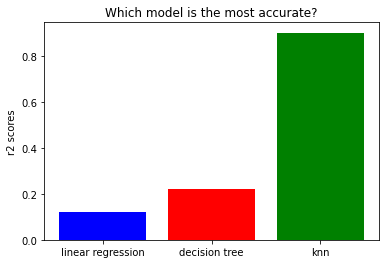

In [68]:
models = ['linear regression', 'decision tree', 'knn']
r2_scores = [0.12, 0.22, 0.90,]

plt.bar(models, r2_scores, color=['blue', 'red', 'green'])
plt.ylabel("r2 scores")
plt.title("Which model is the most accurate?")
plt.show()

In [69]:
#Save Model using pickle
#DecisionTreeRegressor
import pickle
pickle.dump( model, open("model.pkl","wb"))

In [70]:
model1= pickle.load(open("model.pkl","rb"))
model1

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputeN',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['ROM(GB)', 'RAM(GB)', 'Primary_Cam(MP)', 'Selfi_Cam(MP)',
       'Battery_Power(mAh)'],
      dtype='object'))])),
                ('est', DecisionTreeRegressor())])

In [71]:
model1.predict(X_test)

array([15490.        ,  1103.81578947,   874.        , 44990.        ,
        1125.        ,   925.42857143,  1579.        , 15332.33333333,
        1221.75      ,   899.        ,  9744.        ,   945.        ,
        1110.        , 15990.        , 36599.        , 19999.        ,
       11999.        ,   962.25      ,  1299.        ,  9999.        ,
       29499.        ,  1103.81578947, 20570.        ,  1499.        ,
       17990.        ,   899.        ,  9124.        , 18990.        ,
       16090.        ,  1103.81578947, 41158.16666667,   990.        ,
       34990.        , 21999.        , 38050.        , 12374.        ,
        1125.        ,   599.        , 27999.        ,  1114.        ,
       16675.        ,  1677.        ,   792.81818182,  9599.        ,
        1792.14285714, 16899.        , 16998.        ,  1114.        ,
       39999.        , 22656.66666667, 11999.        ,   948.        ,
       11999.        , 11999.        ,  1677.        , 14753.        ,
      

In [72]:
df.shape

(1005, 7)